In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import scipy.io.wavfile as wavfile
import wave

In [21]:
with open("aah.wav", "rb") as f:
    sampleRate, aah = wavfile.read(f)
    print aah.shape
    if len(aah.shape) == 2 and aah.shape[1] == 2:
        aah = aah[:, 0]

(226560L, 2L)


In [11]:
from scipy.fftpack import fft

In [23]:
aah = aah / (2.0*10**15)
timeArray = np.arange(0, len(aah), 1)
sampFreq = 44110.0
timeArray = timeArray/sampFreq
timeArray = timeArray * 1000

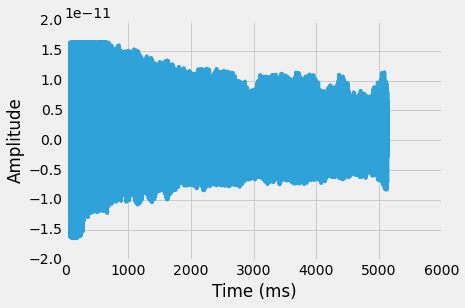

In [27]:
plt.plot(timeArray, aah);
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

In [29]:
def amplitude(soundFile, frequency = 44110.0):
    with open(soundFile, "rb") as f:
        sampleRate, data = wavfile.read(f)
        if len(data.shape) == 2 and data.shape[1] == 2:
            data = data[:, 0]
    data = data / (2.0*10**15)
    timeArray = np.arange(0, len(data), 1) / frequency * 1000
    plt.plot(timeArray, data);
    plt.xlabel("Time (ms)");
    plt.ylabel("Amplitude");

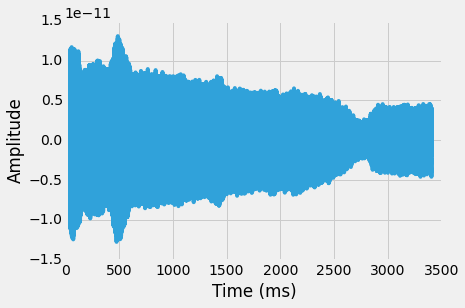

In [30]:
amplitude("mmm.wav")

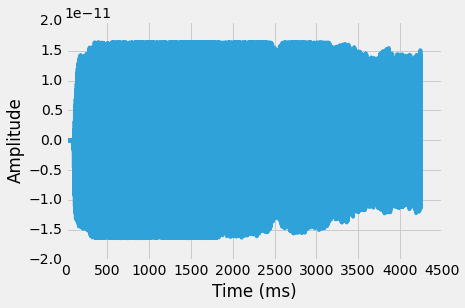

In [31]:
amplitude("eee.wav")

In [32]:
def powerFreq(soundFile, frequency=44110.0):
    with open(soundFile, "rb") as f:
        sampleRate, data = wavfile.read(f)
        if len(data.shape) == 2 and data.shape[1] == 2:
            data = data[:, 0]
    data = data / (2.0*10**15)
    n = len(data)
    p = fft(data)
    nUniquePts = int(np.ceil((n + 1)/2.0))
    p = p[0:nUniquePts]
    p = abs(p)
    p = p / float(n) #scale by number of points
    p = p ** 2 #get the power
    if n % 2 > 0:
        p[1:len(p) - 1] = p[1:len(p)] * 2
    else:
        p[1:len(p) - 1] = p[1:len(p) - 1]*2
    freqArray = np.arange(0, nUniquePts, 1.0) * (frequency / n)
    plt.plot(freqArray/1000.0, 10*np.log10(p));
    plt.xlabel("Frequency (kHz)");
    plt.ylabel("Power (dB)");

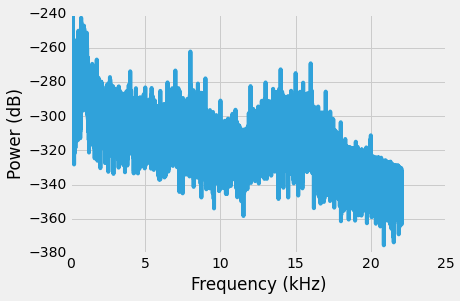

In [33]:
powerFreq("aah.wav")

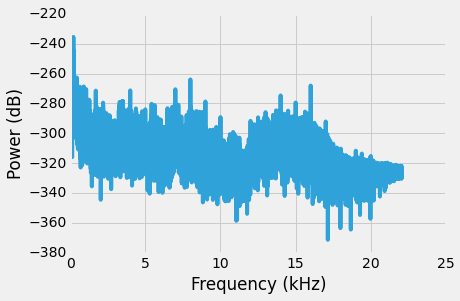

In [34]:
powerFreq("mmm.wav")

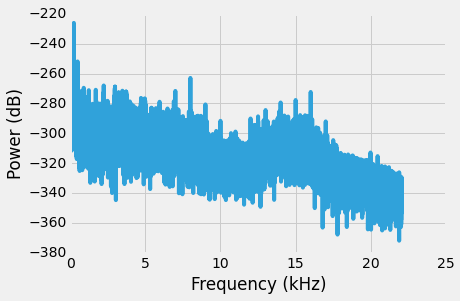

In [35]:
powerFreq("eee.wav")